# TALLER 2 

In [1]:
!python -m spacy download es_core_news_md

[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [1]:
import os

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import StanfordPOSTagger

from wordcloud import WordCloud

import spacy
from spacy import displacy
import es_core_news_md

from pymongo import MongoClient

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
jar = "./pos-tagger/stanford-postagger/stanford-postagger-4.2.0.jar"
model = "./pos-tagger/stanford-postagger/models/spanish-ud.tagger"
os.environ["JAVAHOME"] = "/usr/bin/java"

In [3]:
nlp = es_core_news_md.load()

In [17]:
# Creating a connection to MongoDB
client = MongoClient("localhost", 27017)
db = client["TallerDos"]
collection = db["bogota"]

In [18]:
text = []
for news in list(collection.find({}, {"title": 1, "summary": 1, "full_text": 1, "_id": 0})):
    text.append(news["title"])
    text.append(news["summary"])
    text.append(news["full_text"])

KeyError: 'summary'

In [19]:
text = " ".join(text)

In [20]:
text

'Jardín Botánico de Bogotá anunció su segunda ruta agroecológica  Esta iniciativa se compone de un circuito de cinco huertas urbanas con historia, patrimonio, mitos y muchas actividades que los ciudadanos podrán compartir. Conozca cómo inscribirse. El Jardín Botánico de Bogotá junto con el Instituto Distrital de Turismo (IDT) anunció que llevará a cabo su segunda ruta agroecológica “De huerta en huerta”, una iniciativa que apunta al posicionamiento de la actividad agroecológica urbana y periurbana desde una perspectiva turística, promoviendo el conocimiento de las huertas como espacios de interacción. Según la entidad, este proyecto es una apuesta del Plan de Desarrollo Distrital que busca promover nuevas oportunidades de crecimiento económico para los agricultores urbanos por medio de recorridos turísticos en sus huertas. El lanzamiento de la ruta agroecológica Centro de Bogotá tendrá lugar en la huerta Antigua Fábrica de Loza Bakatá (Av. Los Comuneros con Cra. 2A) el próximo martes 2

In [21]:
# Word tokenization
words = word_tokenize(text)

In [22]:
words[:25]

['Jardín',
 'Botánico',
 'de',
 'Bogotá',
 'anunció',
 'su',
 'segunda',
 'ruta',
 'agroecológica',
 'Esta',
 'iniciativa',
 'se',
 'compone',
 'de',
 'un',
 'circuito',
 'de',
 'cinco',
 'huertas',
 'urbanas',
 'con',
 'historia',
 ',',
 'patrimonio',
 ',']

In [23]:
# Words distribution
frec_dist = FreqDist(words)

In [24]:
# Printing the most common words
frec_dist.most_common(10)

[('de', 107),
 (',', 84),
 ('la', 68),
 ('.', 40),
 ('y', 28),
 ('en', 27),
 ('que', 26),
 ('el', 26),
 ('a', 25),
 ('del', 19)]

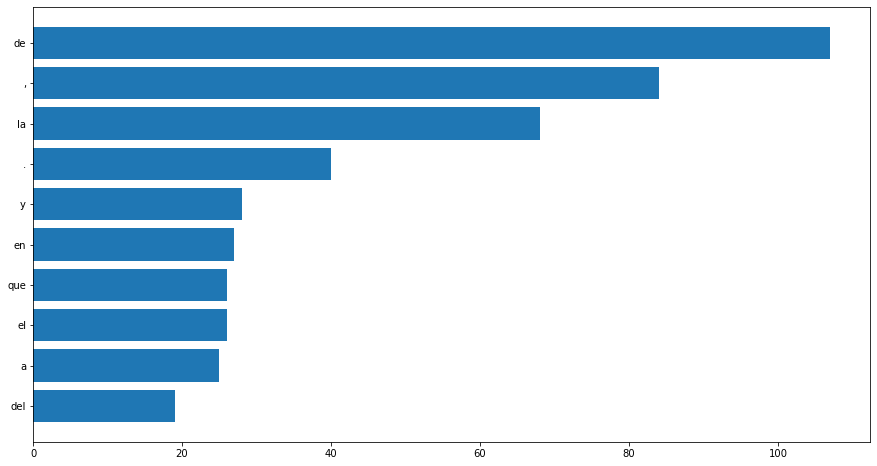

In [25]:
# Plotting a bar char for frecuencies
n = 10

plt.figure(figsize = (15, 8))
plt.barh([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])
plt.gca().invert_yaxis()

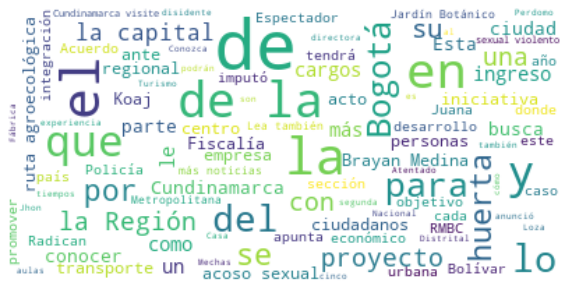

In [26]:
# Creating the wordcloud
# Word size is directly related to frecuency
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(text)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [27]:
# Named Entity Recognition (NER)
document = nlp(text)
displacy.render(document, style = "ent")